# **Диагностика технического состояния подшипника (смазка)**

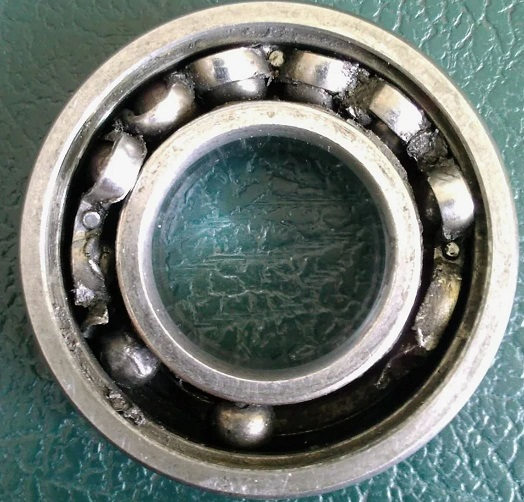

# **Тема исследования**
Важнейшим фактором, влияющим на работоспособность подшипниковой продукции промышленного предприятия, и определяющего их срок службы до момента возникновения дефекта, является состояние их смазочного материала, его качество и количество. Качественные характеристики консистентных смазок определяются требованиями стандартов на смазки и, как правило, в процессе эксплуатации не меняются. Применение смазочных материалов с неподходящими характеристиками или просто продукции неизвестного происхождения вытекает в преждевременные отказы подшипников. Производятся разборы данных инцидентов и вопросы качества переносятся в плоскость снабжения и поставок материалов у проверенных поставщиков.
Количество смазки в подшипнике напротив целиком и полностью зависит от человеческого фактора и того, как сервисный персонал произведет техническое облсуживание оборудования. При недостаточном количестве смазки в подшипнике увеличивается трение в подвижных элементах, происходт рост температуры, изменение рабочих зазоров между вращающимися телами. Что грозит полным разрушением подшипника и остановкой оборудования. При избыточном количестве смазки повышается сопротивления вращению элементов подшипника, создается избыточное давление что приводит к выходу из строя уплотнительной манжеты подшипника и попаданию загрязнений внутрь детали. В результате срок службы подшипника сокращается и становится трудно прогнозируемым по причине нелинейности протекающих деструктивных процессов в нем.
Предлагаемая модель позволяет выполнять диагностическую функцию по контролю за состоянием смазки в подшипниках в период эксплуатации. Целевая переменная - bearing state, характеризует работу подшипника в следующих режимах:

1.   шарикоподшипник с уплотнением с рекомендуемым количеством смазки;
2.   шарикоподшипник без уплотнения без смазки;
2.   шарикоподшипник без уплотнения с избыточным количеством смазки.



# **Описание датасета**
Этот маркированный набор данных предоставляется в виде файла CSV и содержит показатели вибрации подшипника 6204: v-RMS, a-RMS, a-Peak, коэффициент амплитуды и показатели температуры с использованием датчика вибрации IFM VVB001. Измерения снимались каждые две минуты сенсорным устройством.
Описание признаков согласно руководству по эксплуатации датчика и инструкции по эксплуатации:

*   v -RMS (эффективное значение виброскорости) - измеряет общую нагрузку вращающейся машины. Наиболее частые виды перегрузок (дисбаланс, ошибки центровки и т. д.) отражаются в v-RMS. Повышенная нагрузка может вывести машину из строя в долгосрочной перспективе (усталость, усталостная прочность) или, в крайнем случае, разрушить ее за короткое время. Выражается в м/с.
*   a -RMS (эффективное значение ускорения) - обнаруживает механический контакт компонентов машины. Этот контакт обычно возникает в случае износа (неисправный подшипник, изношенные зубчатые колеса и т. д.) или проблем со смазочными материалами (загрязненная смазка, вода в масле и т. д.). Выражается в м/с 2.
*   a -Peak отслеживает максимальное значение ускорения. Удары при разгоне могут возникать однократно или периодически, как при аварии, например при повреждении подшипников. a-Пик — это мера сил, действующих на машину. Выражается в м/с 2
*   Crest или Коэфициент амплитуды (или пик - фактор) представляет собой описанную характеристическую величину анализа сигнала. Он определяется как отношение максимального значения к эффективному значению (пик/RMS). При контроле состояния характеристическое значение используется для оценки состояния подшипника. Высокочастотные сигналы с короткой длительностью импульса повреждения подшипника генерируют более высокие пиковые значения по отношению к эффективному значению. Это соотношение можно прочитать по пик-фактору
*   Атрибут «Температура» не требует пояснений и выражается в градусах Цельсия



# Задача: построение прогностической модели состояния подшипника

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('bearing_vibration_metrics.csv')

In [ ]:
df.head(10)

,V-RMS,a-RMS,a-Peak,Crest,Temperature,Bearing State
0,0.001074,0.695385,3.198462,4.740000,26.308461,1
1,0.001095,0.713077,3.244615,4.716923,26.299999,1
2,0.001079,0.697143,3.227857,4.795000,26.299999,1
3,0.001080,0.700000,3.213077,4.793077,26.208462,1
4,0.001088,0.700000,3.241538,4.783077,26.200001,1
5,0.001085,0.700000,3.200769,4.737692,26.099231,1
6,0.001079,0.696154,3.204615,4.761538,25.963846,1
7,0.001058,0.690000,3.181538,4.774615,25.900000,1
8,0.001078,0.699231,3.246923,4.836923,25.828461,1
9,0.001082,0.699231,3.235385,4.811538,25.799999,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8569 entries, 0 to 8568
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   V-RMS          8569 non-null   float64
 1   a-RMS          8569 non-null   float64
 2   a-Peak         8569 non-null   float64
 3   Crest          8569 non-null   float64
 4   Temperature    8569 non-null   float64
 5   Bearing State  8569 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 401.8 KB


# Основные статистики для каждого значения целевой переменной - Bearing State

In [ ]:
filtered_data_1 = df[df['Bearing State'] == 1]

print(filtered_data_1)

         V-RMS     a-RMS    a-Peak     Crest  Temperature  Bearing State
0     0.001074  0.695385  3.198462  4.740000    26.308461              1
1     0.001095  0.713077  3.244615  4.716923    26.299999              1
2     0.001079  0.697143  3.227857  4.795000    26.299999              1
3     0.001080  0.700000  3.213077  4.793077    26.208462              1
4     0.001088  0.700000  3.241538  4.783077    26.200001              1
...        ...       ...       ...       ...          ...            ...
3291  0.001048  0.700000  3.230769  4.773846    27.130000              1
3292  0.001054  0.697692  3.243077  4.803846    27.200001              1
3293  0.001067  0.698462  3.220000  4.746923    27.262307              1
3294  0.001035  0.687692  3.146154  4.751538    27.299999              1
3295  0.001042  0.687692  3.196154  4.800769    27.304615              1

[3296 rows x 6 columns]


In [ ]:
filtered_data_1.describe()

,V-RMS,a-RMS,a-Peak,Crest,Temperature,Bearing State
count,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.0
mean,0.001049,0.686683,3.212853,4.756187,26.054698,1.0
std,0.000038,0.024753,0.060114,0.087172,0.816874,0.0
min,0.000962,0.600000,2.996923,4.438462,24.230770,1.0
25%,0.001010,0.684615,3.171264,4.697692,25.496731,1.0
50%,0.001049,0.698462,3.210769,4.755934,25.857692,1.0
75%,0.001086,0.700000,3.253077,4.810769,26.777692,1.0
max,0.001193,0.799231,3.477692,5.183846,27.799999,1.0


In [ ]:
filtered_data_2 = df[df['Bearing State'] == 2]

print(filtered_data_2)

         V-RMS     a-RMS    a-Peak     Crest  Temperature  Bearing State
3296  0.000695  0.609231  3.911539  6.477692    25.938461              2
3297  0.000704  0.600769  3.803846  6.330769    25.933077              2
3298  0.000703  0.607692  3.946923  6.457692    25.959231              2
3299  0.000705  0.617692  3.942308  6.349231    25.900000              2
3300  0.000699  0.602308  3.706154  6.118462    25.900000              2
...        ...       ...       ...       ...          ...            ...
5927  0.000720  0.641538  4.846923  7.443077    23.900000              2
5928  0.000759  0.650769  5.014615  7.589231    23.900000              2
5929  0.000761  0.666923  5.040000  7.503846    23.900000              2
5930  0.000735  0.670000  5.122308  7.546923    23.900000              2
5931  0.000737  0.646154  5.036154  7.666154    23.900000              2

[2636 rows x 6 columns]


In [ ]:
filtered_data_2.describe()

,V-RMS,a-RMS,a-Peak,Crest,Temperature,Bearing State
count,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.0
mean,0.000732,0.660787,4.498802,6.741758,26.522649,2.0
std,0.000030,0.053565,0.668678,0.653450,0.689415,0.0
min,0.000642,0.523846,3.066923,4.799231,23.700001,2.0
25%,0.000708,0.622308,3.997692,6.254533,26.200001,2.0
50%,0.000733,0.656154,4.448462,6.665000,26.700001,2.0
75%,0.000755,0.695385,4.958462,7.231731,27.000000,2.0
max,0.000834,0.914615,7.849231,8.588462,27.500000,2.0


In [ ]:
filtered_data_3 = df[df['Bearing State'] == 3]

print(filtered_data_3)

         V-RMS     a-RMS    a-Peak     Crest  Temperature  Bearing State
5932  0.000669  0.762308  5.940769  7.719231    26.700001              3
5933  0.000694  0.811538  6.573846  8.096154    26.700001              3
5934  0.000700  0.803077  6.410000  7.982308    26.715385              3
5935  0.000704  0.790769  6.002308  7.600769    26.799999              3
5936  0.000718  0.806923  6.087692  7.539231    26.799999              3
...        ...       ...       ...       ...          ...            ...
8564  0.000728  0.880769  7.337692  8.304615    26.866153              3
8565  0.000703  0.853846  6.926154  8.102308    26.806153              3
8566  0.000705  0.834615  6.556923  7.822308    26.892307              3
8567  0.000713  0.862308  6.893846  7.989231    26.799999              3
8568  0.000708  0.866154  7.378462  8.506923    26.799999              3

[2637 rows x 6 columns]


In [ ]:
filtered_data_3.describe()

,V-RMS,a-RMS,a-Peak,Crest,Temperature,Bearing State
count,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.0
mean,0.000727,0.814529,6.399069,7.814599,26.753765,3.0
std,0.000032,0.044970,0.890498,0.788849,0.465074,0.0
min,0.000635,0.615385,3.216154,4.873077,25.700001,3.0
25%,0.000705,0.785714,5.845385,7.336154,26.400000,3.0
50%,0.000725,0.816923,6.457143,7.911538,26.700001,3.0
75%,0.000748,0.845385,7.020000,8.364615,27.000000,3.0
max,0.000842,0.963077,8.972308,9.825385,28.000000,3.0


In [ ]:
num_cols = df.select_dtypes(exclude = 'O').columns.tolist()
num_cols

['V-RMS', 'a-RMS', 'a-Peak', 'Crest', 'Temperature', 'Bearing State']

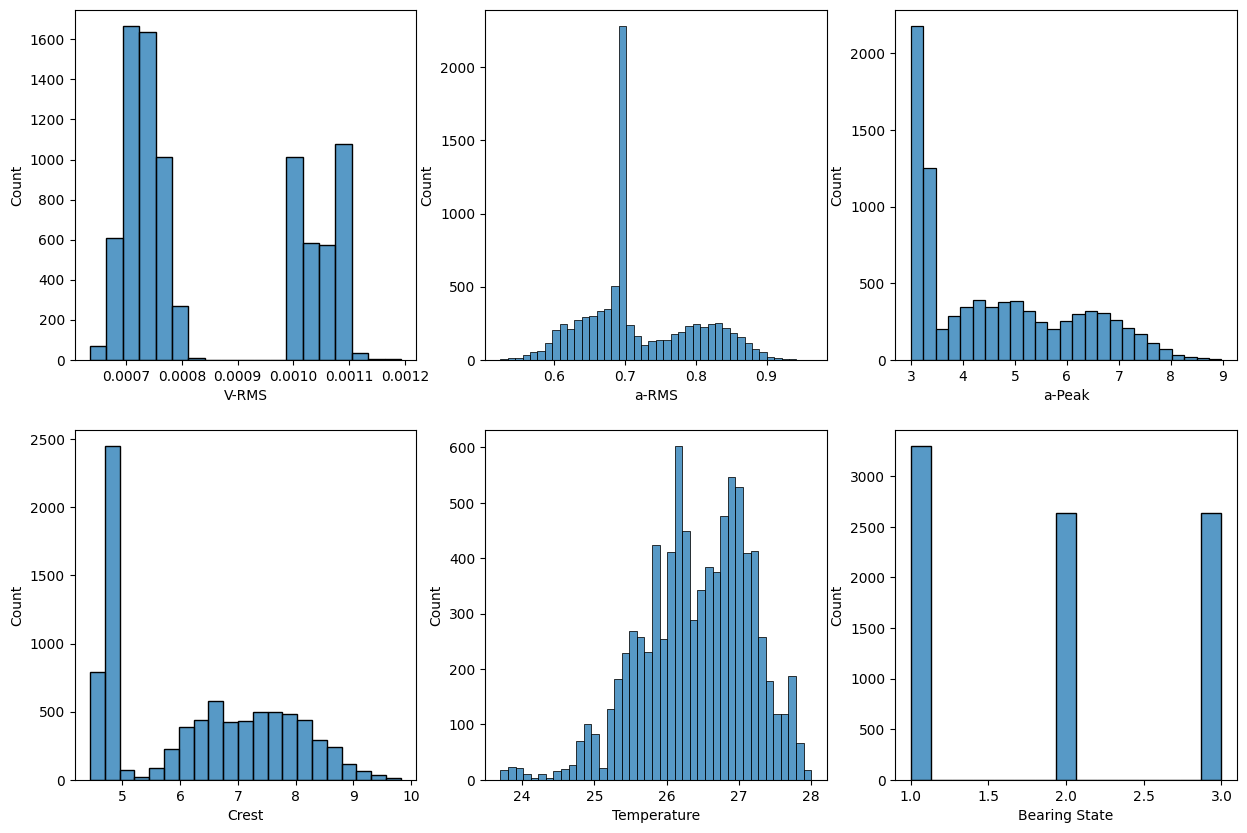

In [ ]:
plt.figure(figsize = (15 , 10))
for i , col in enumerate(num_cols,1):
    plt.subplot(2,3,i)
    sns.histplot(data = df , x= col)

# Анализ гистограмм распределения.
1.   V-RMS (виброскорость) - гистограмма с двумя пиками, что свидетельствует о том что в выборку датасета включены значения для различных состояний подшипника - для "здорового" подшипника значения в правой области, для подшипника с "проблемами" слева;
2.   a-RMS (виброускорение) - также просматриваются области с различными пиками: распределение слева, до 0,799 - исправный подшипник; распределение справа - проблемы со смазкой. Пик в области значения 0,7 - место пересечения значений для каждого типа состояния подшипника(исправные и неисправные);
3.   a-Peak (ударное виброускорение) - видим три пика, которые соответсвуют трем состояниям подшипника, слева - направо: исправен, нет смазки, избыток смазки;
4.   Crest (Пик-фактор) - две явно выраженных пиковых области: до 5 - исправный подшипник, больше 5 - с проблемами со смазкой. Резкий выброс в районе 4,8 - место пересечения значений всех состояний подшипника;
5.   Temperature - распределение с некоторым смещением в правую сторону. Явно выраженных областей, характеризующих состояние смазки подшипника не прослеживается.




# Поиск выбросов в данных с помощью BOXPLOT

Выбросы для столбца a-RMS: [0.963076921609732]
Выбросы для столбца Temperature: [24.2307698910053, 24.2253849322979, 24.2000007629395, 24.2000007629395, 24.180000598614, 24.056923352755, 24.0, 24.0, 23.9061534588154, 23.8999996185303, 23.8999996185303, 23.8999996185303, 23.9107140132359, 24.0, 24.0, 24.0615386962891, 24.0, 24.0307693481445, 24.1000003814697, 24.1000003814697, 24.1000003814697, 24.1000003814697, 24.1000003814697, 24.1000003814697, 24.0153846740723, 24.0, 24.0, 24.0, 23.9530767294077, 23.8999996185303, 23.8999996185303, 23.8999996185303, 23.8138454143818, 23.7999992370605, 23.7999992370605, 23.7999992370605, 23.7999992370605, 23.8730765122634, 23.8999996185303, 23.8999996185303, 23.8999996185303, 23.8999996185303, 23.8999996185303, 23.9607690664438, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.971538396982, 23.9476921374981, 24.0, 23.9753844921405, 23.8999996185303, 23.8376916738657, 23.7999992370605, 23.7915379450871, 23.7000007629395, 23.7846148564265, 23.7999992370605

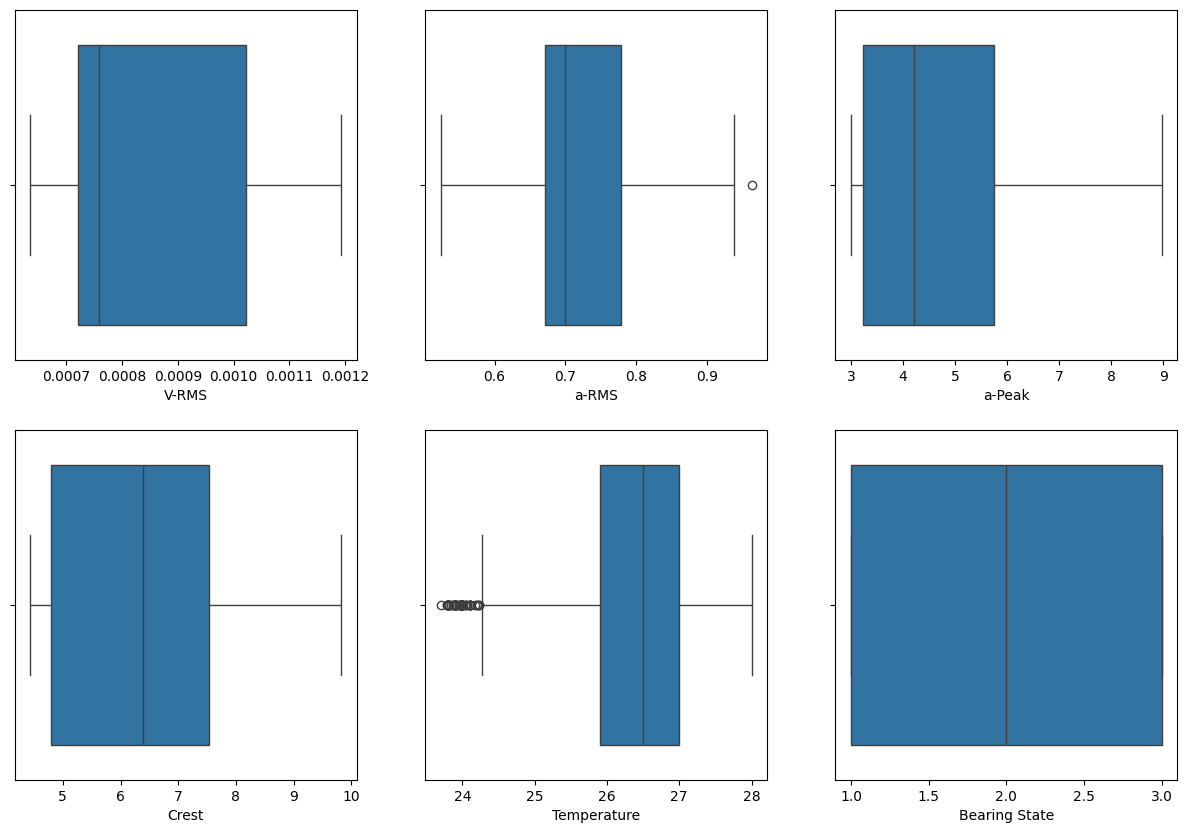

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col)

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)][col]
    if len(outliers) > 0:
        print(f"Выбросы для столбца {col}: {list(outliers)}")

Выбросы, выявленные в датасете при проведении технического анализа:
1.   a-RMS (виброускорение) - диаграмма Boxplot визуализирует одно, похожее на выброс значение - 0,963.
2.   Temperature - целый ряд значений попал под определение выбросов в данных, температура ниже 24,23 С.




# Удаляем выбросы

In [ ]:
df = df[(df['a-RMS'] < 0.96307) | (df['Temperature'] > 24.23)]

# Построим парные диаграммы для визуализации взаимосвязей признаков и целевой переменной

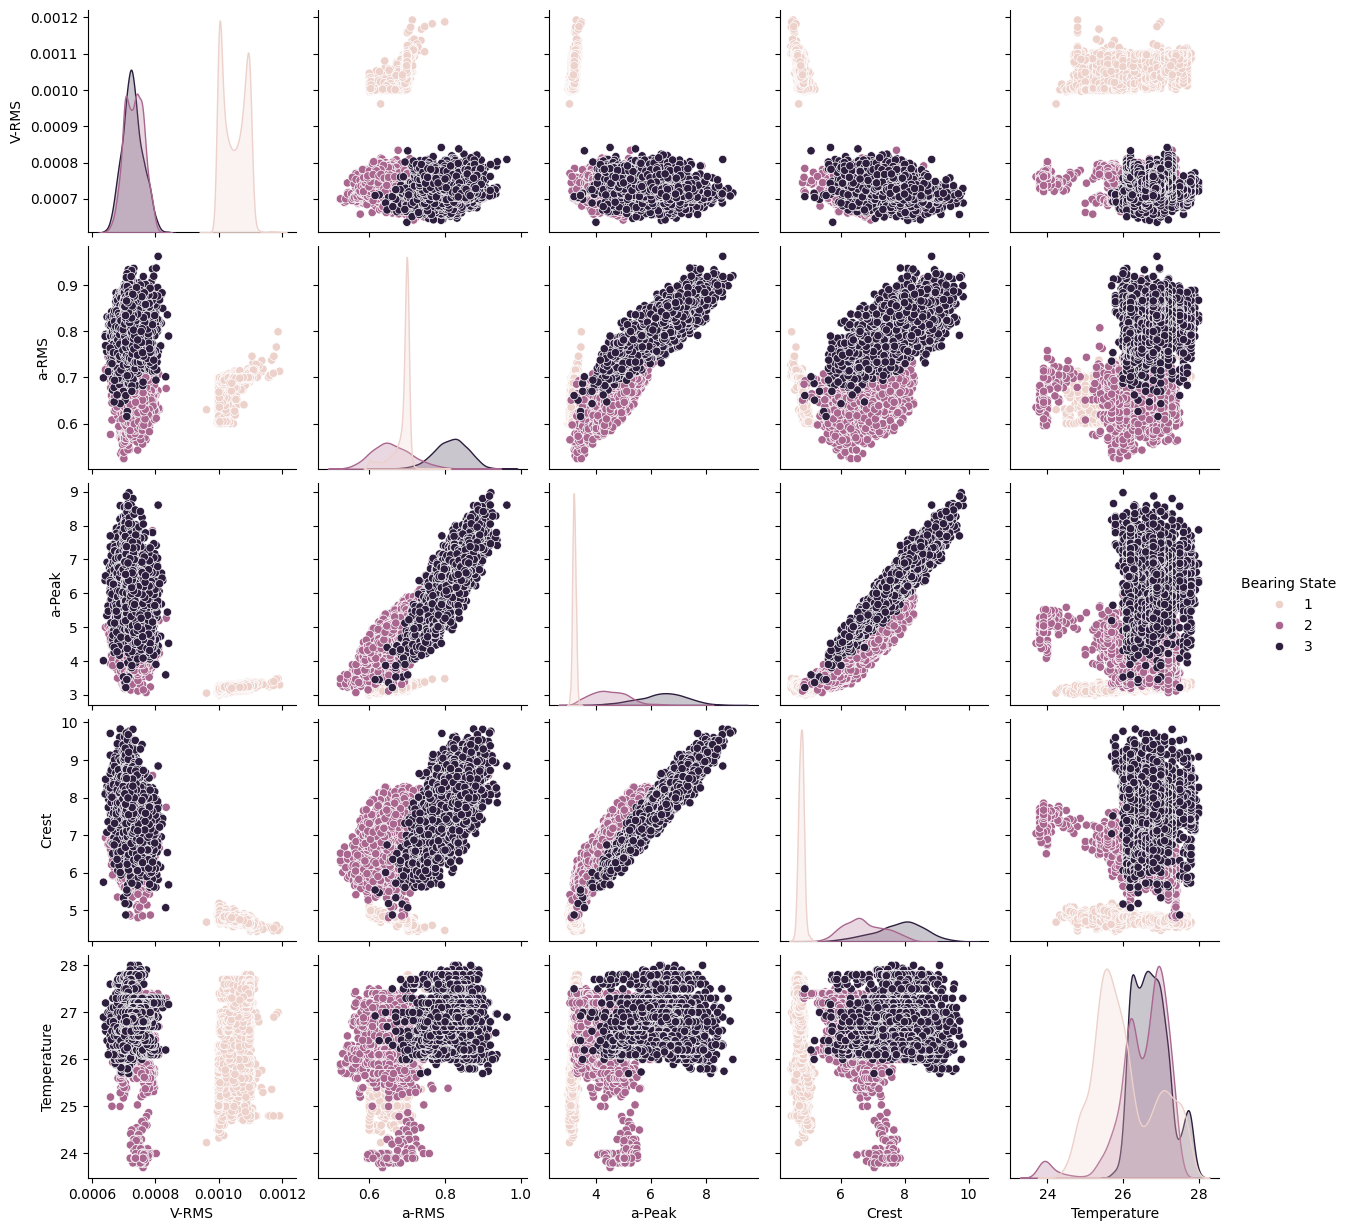

In [ ]:
sns.pairplot(df , hue = 'Bearing State')

На диаграмме Pairplot наглядно видна корреляция между признаками. Например, наблюдается практически прямо пропорциональная связь между ростом одного вибрационного показателя a-RMS и другого a-Peak. При этом показатели вброскорости для исправных подшипников показывают линейную зависимость от виброускорения, для подшипников с "проблемами" со смазкой такой зависимости нет, показатели виброускорения сразу высокие.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8569 entries, 0 to 8568
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   V-RMS          8569 non-null   float64
 1   a-RMS          8569 non-null   float64
 2   a-Peak         8569 non-null   float64
 3   Crest          8569 non-null   float64
 4   Temperature    8569 non-null   float64
 5   Bearing State  8569 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 401.8 KB


In [ ]:
df.describe()

,V-RMS,a-RMS,a-Peak,Crest,Temperature,Bearing State
count,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000
mean,0.000852,0.718060,4.588954,6.308177,26.413778,1.923095
std,0.000159,0.077410,1.456797,1.417231,0.747099,0.828580
min,0.000635,0.523846,2.996923,4.438462,23.700001,1.000000
25%,0.000721,0.670714,3.233571,4.789231,25.901538,1.000000
50%,0.000759,0.700000,4.204615,6.393077,26.500000,2.000000
75%,0.001022,0.779231,5.736923,7.533846,27.000000,3.000000
max,0.001193,0.963077,8.972308,9.825385,28.000000,3.000000


# Построим тепловую карту для изучения корреляции признаков между собой

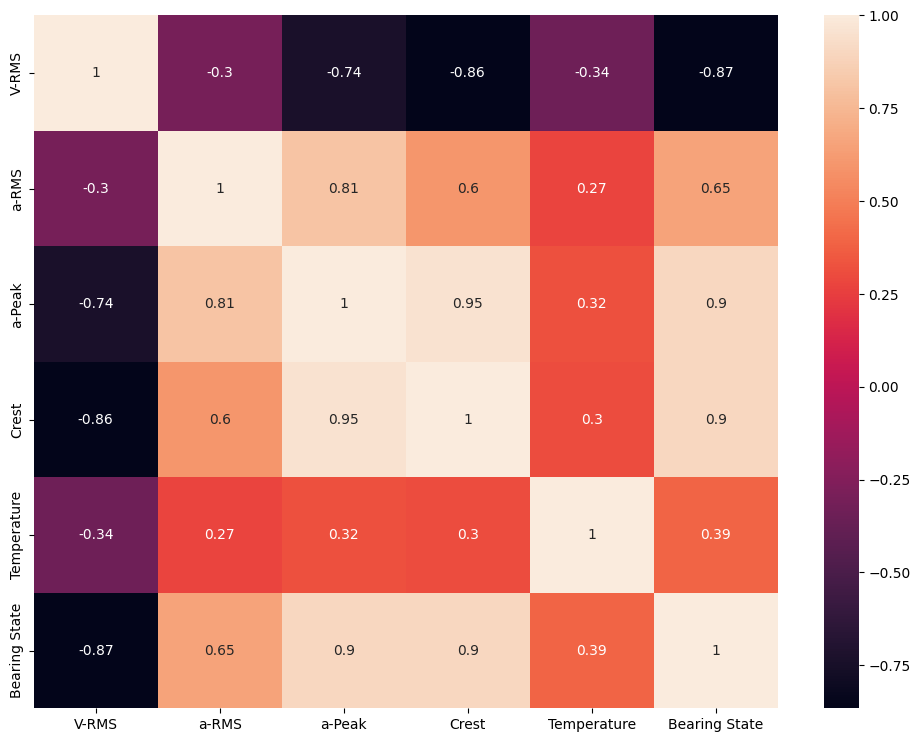

In [ ]:
corr = df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True)
plt.show()

Из матрицы корреляции мы видим что все признаки достаточно сильно коррелируются между собой. Причем наиболее сильная взаимосвязь наблюдается между признаками: виброскорость и ударное виброускорение (отрицательная корреляция), виброускорение и ударное виброускорение (положительная корреляция, что логично из определения). И относительно слабая корреляция между температурой и другими признаками (она прослеживается и положительная (кроме виброскорости), но относительно меньше других.

# Посмотрим распределение целевой переменной (Bearing State)

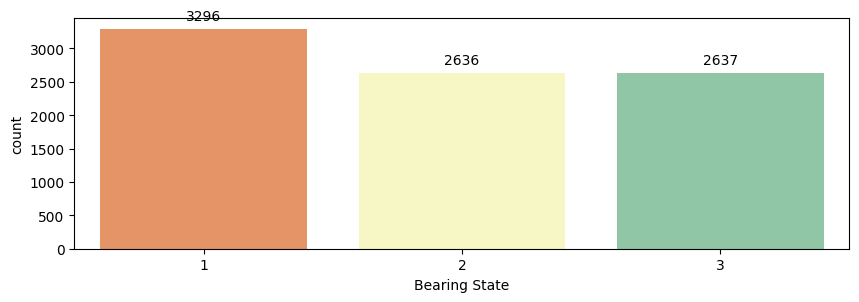

In [ ]:
plt.figure(figsize=(10, 3))

# создаем диаграмму
ax = sns.countplot(x="Bearing State", data=df, palette="Spectral")

# добавляем численные значения на каждый столбец
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

# Подготовка датасета для дальнейшего моделирования

In [ ]:
X = df.drop(['Bearing State'], axis = 1)
y = df['Bearing State']
# разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape

(6855, 5)

In [ ]:
cols = X_train.columns
cols

Index(['V-RMS', 'a-RMS', 'a-Peak', 'Crest', 'Temperature'], dtype='object')

Так как в наших данных наблюдается разброс в значениях признаков - для температуры это десятки, для вибрации это тысячные части то для приведения всех признаков к одному масштабу произведем нормализацию данных.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

,V-RMS,a-RMS,a-Peak,Crest,Temperature
0,-0.933342,1.496929,2.094280,1.980181,-0.279858
1,1.478677,-0.243517,-0.987748,-1.192704,-1.790161
2,-0.904339,0.686040,0.930994,0.989295,0.793033
3,0.922801,-1.321406,-1.000313,-1.007587,-0.950416
4,1.430340,-0.243517,-0.963665,-1.171116,0.256587
...,...,...,...,...,...
6850,1.497321,-0.243517,-0.871412,-1.132142,1.061257
6851,-0.768996,0.854151,0.798540,0.701636,0.793033
6852,0.932469,-0.747850,-0.985130,-1.058319,-1.711757
6853,-0.634688,-1.345422,0.079957,0.853908,0.256587


In [ ]:
X_test

,V-RMS,a-RMS,a-Peak,Crest,Temperature
0,-1.119439,0.876754,1.226751,1.280385,1.329478
1,-0.930925,0.362532,0.736726,0.875458,0.793033
2,-0.556313,-1.677406,-0.587247,-0.000511,-1.005092
3,1.546349,-0.243517,-0.897177,-1.212133,-0.888519
4,-0.619151,-1.400517,-0.030733,0.716208,0.215322
...,...,...,...,...,...
1709,-0.725492,1.862818,1.383848,0.968247,0.927145
1710,-0.681989,1.229929,1.330972,1.159840,0.390699
1711,1.531848,-0.243517,-0.881471,-1.077748,1.463590
1712,-0.938175,-0.263294,-0.004033,0.171113,1.025150


In [ ]:
# Создание датасетов на базе полученных данных.
X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

In [ ]:
X_train

,V-RMS,a-RMS,a-Peak,Crest,Temperature
0,-0.933342,1.496929,2.094280,1.980181,-0.279858
1,1.478677,-0.243517,-0.987748,-1.192704,-1.790161
2,-0.904339,0.686040,0.930994,0.989295,0.793033
3,0.922801,-1.321406,-1.000313,-1.007587,-0.950416
4,1.430340,-0.243517,-0.963665,-1.171116,0.256587
...,...,...,...,...,...
6850,1.497321,-0.243517,-0.871412,-1.132142,1.061257
6851,-0.768996,0.854151,0.798540,0.701636,0.793033
6852,0.932469,-0.747850,-0.985130,-1.058319,-1.711757
6853,-0.634688,-1.345422,0.079957,0.853908,0.256587


In [ ]:
X_test

,V-RMS,a-RMS,a-Peak,Crest,Temperature
0,-1.119439,0.876754,1.226751,1.280385,1.329478
1,-0.930925,0.362532,0.736726,0.875458,0.793033
2,-0.556313,-1.677406,-0.587247,-0.000511,-1.005092
3,1.546349,-0.243517,-0.897177,-1.212133,-0.888519
4,-0.619151,-1.400517,-0.030733,0.716208,0.215322
...,...,...,...,...,...
1709,-0.725492,1.862818,1.383848,0.968247,0.927145
1710,-0.681989,1.229929,1.330972,1.159840,0.390699
1711,1.531848,-0.243517,-0.881471,-1.077748,1.463590
1712,-0.938175,-0.263294,-0.004033,0.171113,1.025150


# Так как отнесение целевой переменной к одному из заранее определенных классов - это задача классификации, то для ее решения будем использовать следующие методы:
1.   Метод KNN;
2.   RandomForestClassifier;
3.   Метод SVM - метод опорных векторов.




# 1. Построим первую модель на базе алгоритма KNN - ближайших соседей
Метод k-ближайших соседей (K-Nearest Neighbors) - Этот метод работает с помощью поиска кратчайшей дистанции между тестируемым объектом и ближайшими к нему классифицированным объектами из обучающего набора. Классифицируемый объект будет относится к тому классу, к которому принадлежит ближайший объект набора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,precision_score

In [ ]:
# Создание классификатора
classifierKNN = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
# Обучение классификатора на тренировочных данных
classifierKNN.fit(X_train.values, y_train.values)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# Применение классификации к тестовым данным.
pred_KNN = classifierKNN.predict(X_test.values)
# Результат предсказания покупок на тестовых данных.
pred_KNN

array([3, 3, 2, ..., 1, 2, 1])

In [ ]:
print(classification_report(y_test, pred_KNN))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       642
           2       0.97      0.98      0.98       563
           3       0.98      0.97      0.97       509

    accuracy                           0.98      1714
   macro avg       0.98      0.98      0.98      1714
weighted avg       0.98      0.98      0.98      1714



# Выбор значения K
В методе KNN выбор значения k очень важен. При маленьком значении k "шум" будет оказывать сильное воздействие на итоговый результат. Большое значение делает его затратным с точки зрения вычислений и противоречит основной идее KNN, что близкие точки могут иметь схожие плотности или классы. Значение по умолчанию для количества k-соседей - 5.

In [ ]:
error_rate = []

for i in range(1,40):
    # создание KNN классификатора с заданным значением k
    knn = KNeighborsClassifier(n_neighbors = i)
    # обучение его на тренировочных данных
    knn.fit(X_train.values, y_train.values)
    # прогноз покупок на тестовых данных
    pred_i = knn.predict(X_test.values)
    # сохранение значения ошибки
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Процент ошибок')

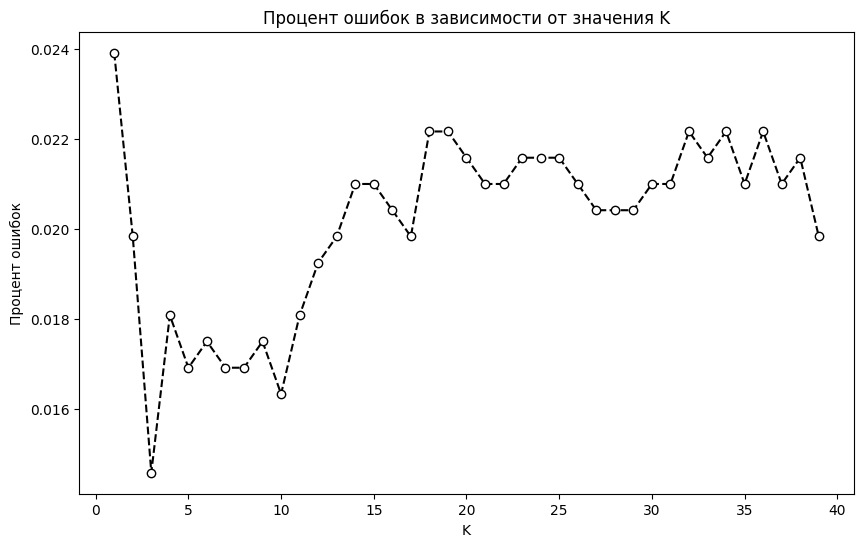

In [ ]:
# графическое представление процента ошибок
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='black', linestyle='dashed', marker='o', markerfacecolor='white', markersize=6)
plt.title('Процент ошибок в зависимости от значения K')
plt.xlabel('K')
plt.ylabel('Процент ошибок')

Из графика видим что минимальный процент ошибок достигается при значении K = 4. Проверим показатели модели на этом значении.

In [ ]:
# Создание классификатора
model1 = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
# Обучение классификатора на тренировочных данных
model1.fit(X_train.values, y_train.values)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Применение классификации к тестовым данным.
pred_KNN = model1.predict(X_test.values)

In [ ]:
KNN_train = model1.score(X_train, y_train)
KNN_test = model1.score(X_test, y_test)
print('Score on train:', KNN_train)
print('Score on test:', KNN_test)

Score on train: 0.9862873814733771
Score on test: 0.9819136522753792


In [ ]:
print(classification_report(y_test, pred_KNN))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       642
           2       0.96      0.98      0.97       563
           3       0.98      0.96      0.97       509

    accuracy                           0.98      1714
   macro avg       0.98      0.98      0.98      1714
weighted avg       0.98      0.98      0.98      1714



В целом разницы в точности предсказаний при изменении k не наблюдается, она уже достаточно высокая.

# Выполним анализ значимости каждого отдельного признака на качество модели KNN

Наиболее значимые признаки для модели KNN (по методу ANOVA):
Признак V-RMS: 72497.65846129255
Признак Crest: 18073.781389107287
Признак a-Peak: 15906.653834207204
Признак a-RMS: 8551.072750525836
Признак Temperature: 662.0914235664031


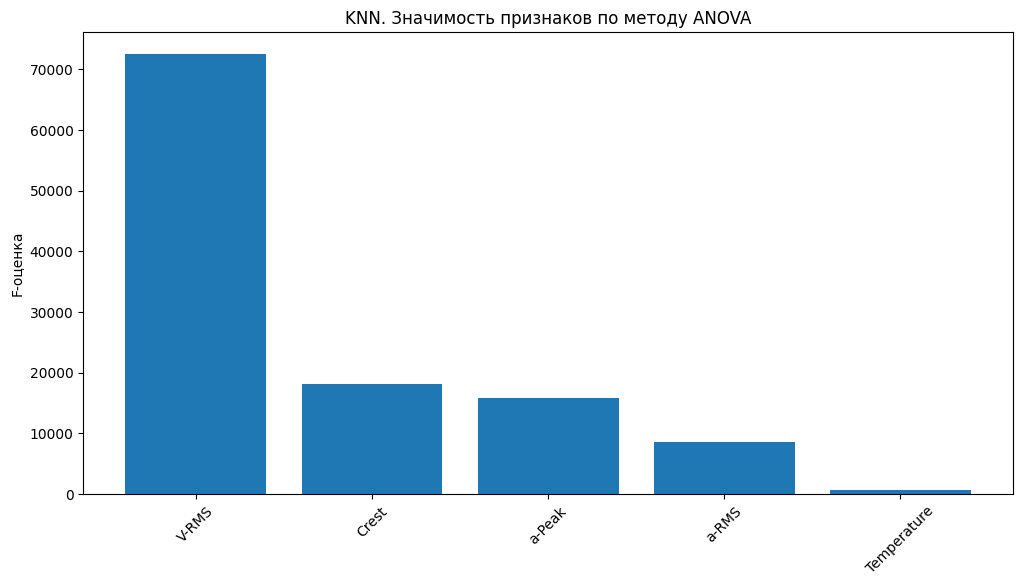

In [ ]:
sorted_importances = sorted(enumerate(f_scores), key=lambda x: x[1], reverse=True)
feature_names = list(df.columns)

print("Наиболее значимые признаки для модели KNN (по методу ANOVA):")
for idx, f_score in sorted_importances:
    print(f"Признак {feature_names[idx]}: {f_score}")

# Получение упорядоченных значимостей и их наименований
ordered_f_scores = [f_score for idx, f_score in sorted_importances]
ordered_feature_names = [feature_names[idx] for idx, f_score in sorted_importances]

plt.figure(figsize=(12, 6))
plt.bar(range(len(ordered_f_scores)), ordered_f_scores)
plt.xticks(range(len(ordered_f_scores)), ordered_feature_names, rotation=45)
plt.ylabel('F-оценка')
plt.title('KNN. Значимость признаков по методу ANOVA')
plt.show()

# 2. RandomForestClassifier
RandomForestClassifier - этот классификатор разбивает данные на всё меньшие и меньшие подмножества на основе разных критериев, т. е. у каждого подмножества своя сортирующая категория. С каждым разделением количество объектов определённого критерия уменьшается.
Классификация подойдёт к концу, когда сеть дойдёт до подмножества только с одним объектом.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
model2 = RandomForestClassifier(random_state=42, max_depth=2)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.9556592765460911

Попробуем подобрать оптимальную глубину обучения "max_depth" для алгоритма


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import graphviz

In [ ]:
# Определите диапазон значений для max_depth
param_grid = {'max_depth': [3, 5, 7, 10, 15, 20]}

# Создайте экземпляр RandomForestClassifier
dt = RandomForestClassifier()

# Создайте экземпляр GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# Обучите GridSearchCV
grid_search.fit(X_train, y_train)

# Получите лучшее значение max_depth
best_max_depth = grid_search.best_params_['max_depth']
print(f"Лучшая глубина обучения (max_depth): {best_max_depth}")

Лучшая глубина обучения (max_depth): 15


In [ ]:
model2 = RandomForestClassifier(random_state=42, max_depth=15)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.9824970828471412

In [ ]:
pred_tree = model2.predict(X_test)

In [ ]:
tree_train = model2.score(X_train, y_train)
tree_test = model2.score(X_test, y_test)
print('Score on train:', tree_train)
print('Score on test:', tree_test)

Score on train: 1.0
Score on test: 0.9824970828471412


In [ ]:
pred_tree = model2.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       642
           2       0.97      0.98      0.97       563
           3       0.97      0.97      0.97       509

    accuracy                           0.98      1714
   macro avg       0.98      0.98      0.98      1714
weighted avg       0.98      0.98      0.98      1714



# Выполним анализ значимости каждого отдельного признака на качество модели RandomForestClassifier

Наиболее значимые признаки для модели случайного леса:
Признак V-RMS: 0.2884447111409268
Признак a-RMS: 0.25988606931915387
Признак Crest: 0.21377191551612718
Признак a-Peak: 0.21180288070334316
Признак Temperature: 0.026094423320449006


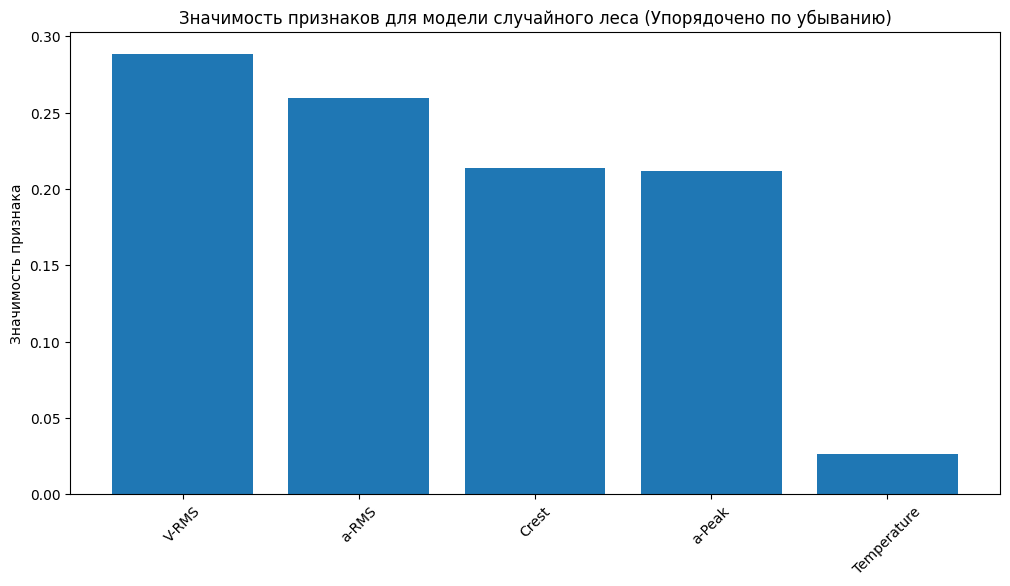

In [ ]:
importances = model2.feature_importances_
sorted_importances = sorted(enumerate(importances), key=lambda x: x[1], reverse=True)
feature_names = list(X.columns)

print("Наиболее значимые признаки для модели случайного леса:")
for idx, importance in sorted_importances:
    print(f"Признак {feature_names[idx]}: {importance}")

# Получение упорядоченных значимостей и их наименований
ordered_importances = [importance for idx, importance in sorted_importances]
ordered_feature_names = [feature_names[idx] for idx, importance in sorted_importances]

plt.figure(figsize=(12, 6))
plt.bar(range(len(ordered_importances)), ordered_importances)
plt.xticks(range(len(ordered_importances)), ordered_feature_names, rotation=45)
plt.ylabel('Значимость признака')
plt.title('Значимость признаков для модели случайного леса (Упорядочено по убыванию)')
plt.show()

# 3. Метод опорных векторов (Support Vector Machines)
SVM - идея метода заключается в построении гиперплоскости, разделяющей объекты выборки оптимальным способом. Алгоритм работает в предположении, что чем больше расстояние (зазор) между разделяющей гиперплоскостью и объектами разделяемых классов, тем меньше будет средняя ошибка классификатора.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
model3 = SVC(random_state=42)
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

0.9731621936989499

In [ ]:
# Применение классификации к тестовым данным.
pred_svc = model3.predict(X_test)

In [ ]:
cvm_train = model3.score(X_train, y_train)
cvm_test = model3.score(X_test, y_test)
print('Score on train:', cvm_train)
print('Score on test:', cvm_test)

Score on train: 0.9708242159008024
Score on test: 0.9731621936989499


In [ ]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       642
           2       0.97      0.95      0.96       563
           3       0.95      0.96      0.96       509

    accuracy                           0.97      1714
   macro avg       0.97      0.97      0.97      1714
weighted avg       0.97      0.97      0.97      1714



# Выполним анализ значимости каждого отдельного признака на качество модели SVC

In [ ]:
from sklearn.feature_selection import RFE

Наиболее значимые признаки для модели SVC:
Признак V-RMS
Признак a-RMS
Признак a-Peak
Признак Crest
Признак Temperature


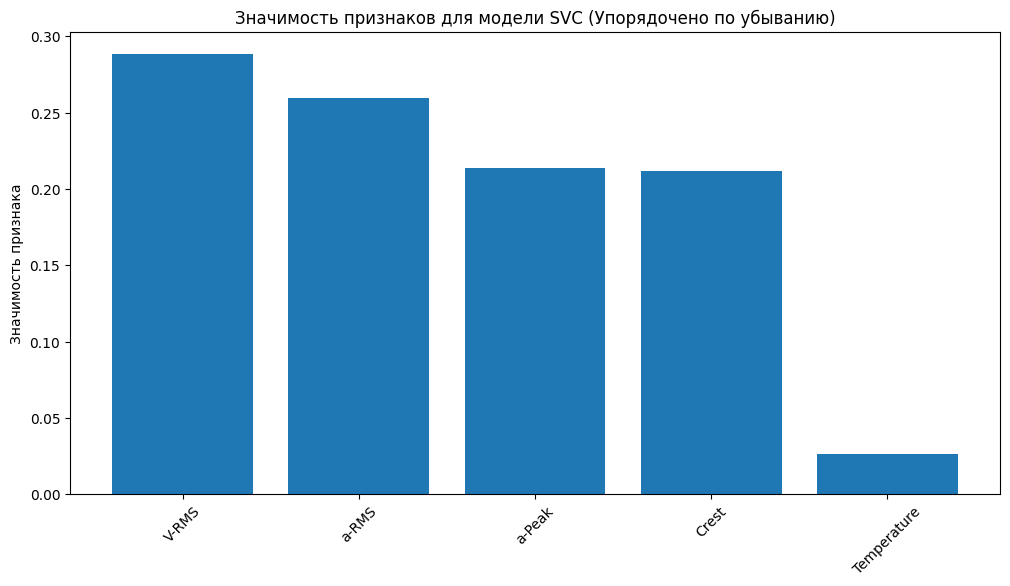

In [ ]:
import matplotlib.pyplot as plt

# Инициализация RFE с моделью SVC и количеством выбираемых признаков
rfe = RFE(model3, n_features_to_select=5)  # Выбор 5 наиболее важных признаков

# Обучение RFE на данных
rfe.fit(X_train, y_train)

# Вывод результатов (наиболее важные признаки)
print("Наиболее значимые признаки для модели SVC:")
selected_feature_names = [feature for idx, feature in enumerate(feature_names) if rfe.support_[idx]]
for feature in selected_feature_names:
    print(f"Признак {feature}")

# Получение значений важности признаков для модели SVC
importances_svc = [importances[idx] for idx, feature in enumerate(feature_names) if feature in selected_feature_names]

# Упорядочивание значимости признаков для модели SVC
sorted_importances_svc = sorted(enumerate(importances_svc), key=lambda x: x[1], reverse=True)
ordered_importances_svc = [importance for idx, importance in sorted_importances_svc]
ordered_feature_names_svc = [feature for idx, feature in enumerate(feature_names) if feature in selected_feature_names]

plt.figure(figsize=(12, 6))
# Используем явный порядок при построении графика
plt.bar(range(len(ordered_importances_svc)), ordered_importances_svc)
plt.xticks(range(len(ordered_importances_svc)), ordered_feature_names_svc, rotation=45)
plt.ylabel('Значимость признака')
plt.title('Значимость признаков для модели SVC (Упорядочено по убыванию)')
plt.show()

Наиболее значимые признаки для модели SVC:
Признак V-RMS
Признак a-RMS
Признак a-Peak
Признак Crest
Признак Temperature


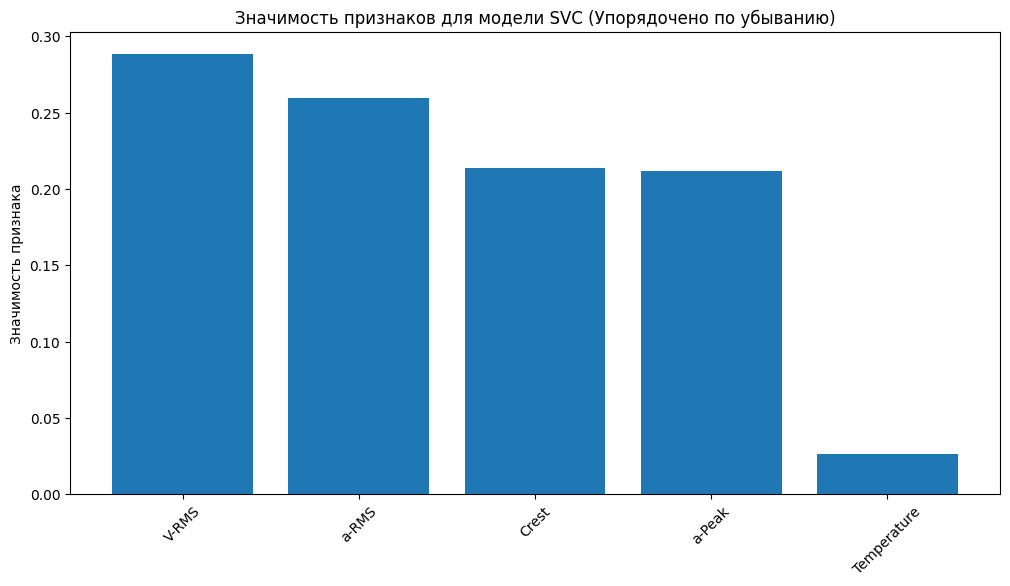

In [ ]:
# Инициализация RFE с моделью SVC и количеством выбираемых признаков
rfe = RFE(model3, n_features_to_select=5)  # Выбор 5 наиболее важных признаков

# Обучение RFE на данных
rfe.fit(X_train, y_train)

# Вывод результатов (наиболее важные признаки)
print("Наиболее значимые признаки для модели SVC:")
selected_feature_names = [feature for idx, feature in enumerate(feature_names) if rfe.support_[idx]]
for feature in selected_feature_names:
    print(f"Признак {feature}")

# Получение индексов наиболее важных признаков
selected_feature_indices = [idx for idx, support in enumerate(rfe.support_) if support]

# Получение значений важности признаков для модели SVC
importances_svc = [importances[idx] for idx in selected_feature_indices]

# Упорядочивание значимости признаков для модели SVC
sorted_importances_svc = sorted(enumerate(importances_svc), key=lambda x: x[1], reverse=True)
ordered_importances_svc = [importance for idx, importance in sorted_importances_svc]
ordered_feature_names_svc = [selected_feature_names[idx] for idx, importance in sorted_importances_svc]

plt.figure(figsize=(12, 6))
plt.bar(range(len(ordered_importances_svc)), ordered_importances_svc)
plt.xticks(range(len(ordered_importances_svc)), ordered_feature_names_svc, rotation=45)
plt.ylabel('Значимость признака')
plt.title('Значимость признаков для модели SVC (Упорядочено по убыванию)')
plt.show()

# Сравним показатели работы трех методов

In [ ]:
metrica = pd.DataFrame()

In [ ]:
resume = [
    ['KNN', KNN_train, KNN_test],
    ['Tree', tree_train, tree_test],
    ['CVM', cvm_train, cvm_test]]

In [ ]:
col = ['Model', 'Score_train', 'Score_test']
metrica = pd.DataFrame(data = resume , columns = col)

In [ ]:
metrica.sort_values (by = ['Score_test'], ascending = [False])

,Model,Score_train,Score_test
1,Tree,1.000000,0.982497
0,KNN,0.986287,0.981914
2,CVM,0.970824,0.973162


# Выводы и заключение
 В рамках настоящей работы по разработке алгоритма диагностирования подшипников качения в период эксплуатации на предмет достаточного количества смазочных материалов в них, по результатам параметрической диагностики, произведено исследование применения трех моделей классификации (метод ближайших соседей, случайный лес и метод опорных векторов). Выполнен анализ важности признаков при работе каждой модели на предсказание целевой переменной. Результаты исследования представлены ниже:

1.   Модель RandomForestClassifier показала наиболее высокие результаты классификации как на тестовых так и на тренировочных данных. На тестовых данных ее ошибка не превышает 2%.
2.   Наиболее значимыми признаками для предсказания целевой переменной "Bearing State" для всех трех моделей оказался признак V-rms - показатель виброскорости (м/с).

В настоящее время, в промышленности все большее значение уделяется вопросам автономной диагностики технического состояния оборудования. На основе результатов показаний датчиков, установленных на оборудовании для контроля вибрации и температуры подшипниковых узлов, прогнозируются отказы оборудования и сроки ремонтов. Предлагаемая модель позволяет расширить возможности использования диагностических данных, для решения задач оптимизации сервисного обслуживания, что позволит продлить сроки службы оборудования, путем корректировки объемов ремонта, в части повышения качества операции по смазке оборудования, производя ее в достаточном количестве и в требуемое время. Что, в конечном счете позволит сократить затраты на обслуживание оборудования с благодаря росту срока службы деталей.

